## Loading Libraries

In [633]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler,LabelBinarizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,f1_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_pipeline_imb

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [634]:
df = pd.read_csv('Churn_MTN.csv')
df.head()

,Customer ID,tariff_type,subscriber_type,rev_voice_onnet,rev_voice_offnet,rev_voice_int,rev_voice_roam_outgoing,rev_voice_roam_incoming,rev_sms_onnet,rev_sms_offnet,...,total_recharge_amount,dola,nw_3g_ind,lte_4g_ind,postpaid_subscriptions,reversed_bill_rev,activation_date,churn_date,dola_max,churn_flag
0,1,39 - Better Talk,PREPAID,0.0,0.0,862.950012,0,0,0.0,0.0,...,800.0,0,0.0,0.0,0,0,12/30/2007,5/13/2017,0,1
1,2,30 - MTN-TruTalk,PREPAID,0.0,0.0,66.660004,0,0,0.0,0.0,...,0.0,0,0.0,0.0,0,0,11/26/2013,5/13/2017,5,1
2,3,Dummy Plan,PREPAID,0.0,0.0,0.000000,0,0,0.0,0.0,...,0.0,6,NaN,NaN,0,0,NaN,5/7/2017,96,0
3,4,46 - NEW BETATALK SERVICE CLASS,PREPAID,0.0,0.0,0.000000,0,0,0.0,0.0,...,30.0,0,0.0,0.0,0,0,6/5/2011,5/13/2017,19,1
4,5,41 - XTRA PRO,PREPAID,0.0,0.0,0.000000,0,0,0.0,0.0,...,0.0,7,1.0,0.0,0,0,9/25/2014,5/6/2017,90,0


In [635]:
len(df.columns)

61

In [636]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67238 entries, 0 to 67237
Data columns (total 61 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  67238 non-null  int64  
 1   tariff_type                  67238 non-null  object 
 2   subscriber_type              67238 non-null  object 
 3   rev_voice_onnet              67238 non-null  float64
 4   rev_voice_offnet             67238 non-null  float64
 5   rev_voice_int                67238 non-null  float64
 6   rev_voice_roam_outgoing      67238 non-null  int64  
 7   rev_voice_roam_incoming      67238 non-null  int64  
 8   rev_sms_onnet                67238 non-null  float64
 9   rev_sms_offnet               67238 non-null  float64
 10  rev_sms_int                  67238 non-null  float64
 11  rev_vas1                     67238 non-null  float64
 12  rev_vas2                     67238 non-null  float64
 13  rev_vas3        

In [637]:
df.describe()

,Customer ID,rev_voice_onnet,rev_voice_offnet,rev_voice_int,rev_voice_roam_outgoing,rev_voice_roam_incoming,rev_sms_onnet,rev_sms_offnet,rev_sms_int,rev_vas1,...,mou_local_offnet,mou_intl,total_recharge_amount,dola,nw_3g_ind,lte_4g_ind,postpaid_subscriptions,reversed_bill_rev,dola_max,churn_flag
count,67238.000000,67238.000000,67238.000000,67238.000000,67238.0,67238.0,67238.000000,67238.000000,67238.000000,67238.000000,...,67238.000000,67238.000000,67238.000000,67238.000000,57164.000000,57164.000000,67238.0,67238.0,67238.000000,67238.000000
mean,32492.201538,94.448303,36.238825,6.243566,0.0,0.0,1.992180,0.809687,0.268768,43.321810,...,387.798102,4.994771,176.438702,13.732294,0.300189,0.022759,0.0,0.0,41.045555,0.539397
std,18903.732719,318.689511,110.286147,61.354914,0.0,0.0,10.868746,5.183341,4.306638,192.921686,...,1005.444730,41.428368,395.570926,22.750091,0.458344,0.149136,0.0,0.0,41.013147,0.498449
min,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,16116.250000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000
50%,32341.500000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,21.000000,1.000000
75%,48830.750000,77.559998,17.200001,0.000000,0.0,0.0,0.000000,0.000000,0.000000,10.000000,...,312.000000,0.000000,200.000000,20.000000,1.000000,0.000000,0.0,0.0,91.000000,1.000000
max,65521.000000,47145.200010,1405.320000,1211.250000,0.0,0.0,199.630000,97.590000,110.300000,4004.000000,...,19369.120000,1520.800000,6490.330000,96.000000,1.000000,1.000000,0.0,0.0,96.000000,1.000000


In [638]:
df.isna().sum()

Customer ID            0
tariff_type            0
subscriber_type        0
rev_voice_onnet        0
rev_voice_offnet       0
                    ... 
reversed_bill_rev      0
activation_date      120
churn_date             0
dola_max               0
churn_flag             0
Length: 61, dtype: int64

## Exploratory Data Analysis

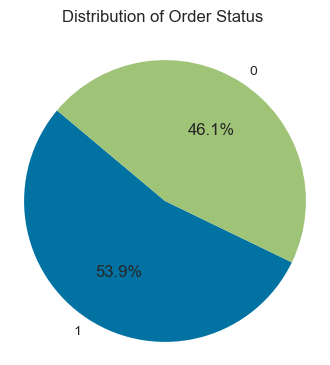

In [639]:
plt.figure(figsize=(4,4))
output_counts = df['churn_flag'].value_counts()
plt.pie(output_counts, labels=output_counts.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.title('Distribution of Order Status \n')
plt.ylabel('')

plt.show()

#### Observation:
    
The target column looks imbalanced - accuracy would not be a good metric to evaluate the model and we would need to apply balancing techniques like SMOTE while modeling

#### Observation:
    
It does not look like there are many outliers in the numerical features, except Age - but we can't do much about it

Count plot for categorical features:


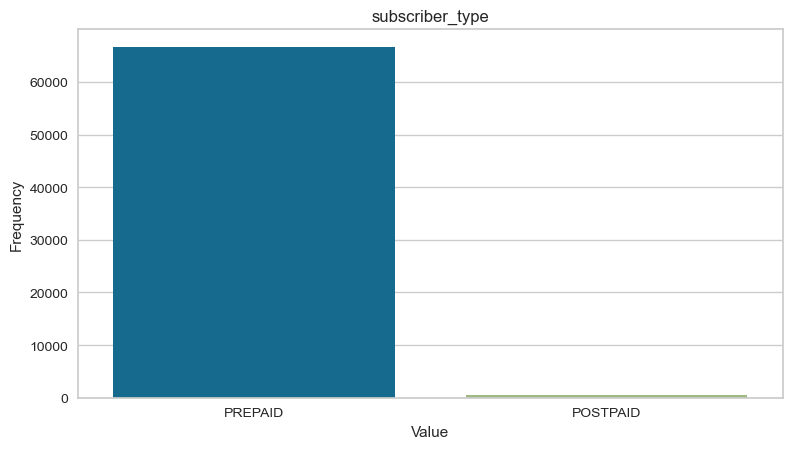

In [640]:
print("Count plot for categorical features:")
plt.figure(figsize=(20,22))

for i, column in enumerate(['subscriber_type']):
    plt.subplot(4,2,i + 1)
    sns.countplot(x= df[column], data=df)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

In [641]:
# Replace 'customer_id' with the actual column name for unique customer identification
unique_customers_per_category = df.groupby(['subscriber_type', 'churn_flag'])['Customer ID'].nunique()

# Display the result
print(unique_customers_per_category)

subscriber_type  churn_flag
POSTPAID         0               456
                 1               132
PREPAID          0             30177
                 1             35625
Name: Customer ID, dtype: int64


In [642]:
total_customer = df['Customer ID'].nunique()
print("The tOTAL UNIQUE CUSTOMERS",total_customer)

The tOTAL UNIQUE CUSTOMERS 65521


In [643]:
df.groupby(['subscriber_type', 'churn_flag'])['Customer ID'].nunique()

subscriber_type  churn_flag
POSTPAID         0               456
                 1               132
PREPAID          0             30177
                 1             35625
Name: Customer ID, dtype: int64

In [644]:
# Grouping by 'subscriber_type' and 'churn_flag' and counting unique 'Customer ID'
grouped_counts = df.groupby(['subscriber_type', 'churn_flag'])['Customer ID'].nunique()

In [645]:
# Grouping by 'Customer ID' and summing the 'churn_flag'
churn_sums = df.groupby('Customer ID')['churn_flag'].sum()

In [646]:
# Counting how many customers have a churn sum of 0
count_sum_0 = (churn_sums == 0).sum()

In [647]:
# Counting how many customers have a churn sum greater than 1
count_sum_greater_than_1 = (churn_sums >= 1).sum()

In [648]:
# Display results
print("Number of customers with churn sum = 0:", count_sum_0)
print("Number of customers with churn sum > 1:", count_sum_greater_than_1)

Number of customers with churn sum = 0: 29768
Number of customers with churn sum > 1: 35753


In [649]:
churn_rate = count_sum_0/total_customer

print("No Churn Rate",churn_rate)

No Churn Rate 0.4543276201523176


### CREATING SEGMENTS

In [650]:
# Calculate total voice revenue
df['total_voice_revenue'] = (
    df['rev_voice_onnet'] +
    df['rev_voice_offnet'] +
    df['rev_voice_int'] +
    df['rev_voice_roam_outgoing'] +
    df['rev_voice_roam_incoming']
)

In [651]:
# Calculate total SMS revenue
df['total_sms_revenue'] = (
    df['rev_sms_onnet'] +
    df['rev_sms_offnet'] +
    df['rev_sms_int']
)

In [652]:
# Calculate total VAS revenue
df['total_vas_revenue'] = (
    df['rev_vas1'] +
    df['rev_vas2'] +
    df['rev_vas3'] +
    df['rev_vas4'] +
    df['rev_other_vas']
)


In [653]:
# Clean 'tot_rev_in' by replacing 'null' strings and stripping whitespace
df['tot_rev_in_trim'] = df['tot_rev_in'].replace([' null', 'nan', None], '0').str.strip()

In [654]:


# Cast to float and replace remaining NaN values with 0
df['tot_rev_in_trim'] = df['tot_rev_in_trim'].astype(float).fillna(0)

In [655]:
# Calculate total revenue
df['total_revenue'] = (
    df['total_voice_revenue'] +
    df['total_sms_revenue'] +
    df['total_vas_revenue'] +
    df['rev_data_total']+
    df['tot_rev_in_trim']   # Assuming this is total data revenue
)

In [656]:
# Display the updated DataFrame
df[['Customer ID','total_voice_revenue', 'total_sms_revenue', 'total_vas_revenue', 'rev_data_total', 'tot_rev_in_trim', 'total_revenue']].head()

,Customer ID,total_voice_revenue,total_sms_revenue,total_vas_revenue,rev_data_total,tot_rev_in_trim,total_revenue
0,1,862.950012,0.0,80.0,0.0,548.133362,1491.083374
1,2,66.660004,0.0,0.0,0.0,166.326660,232.986664
2,3,0.000000,0.0,0.0,0.0,0.390000,0.390000
3,4,0.000000,0.0,0.0,0.0,0.715000,0.715000
4,5,0.000000,0.0,0.0,0.0,0.000000,0.000000


In [657]:
df['TOTAL_INCOMING_CALLS_COUNTER'] = (df['voi_onnet_in_counter'] + 
                                       df['voi_offnet_in_counter'] + 
                                       df['voi_int_in_counter'])

In [658]:
df['TOTAL_OUTGOING_CALLS'] = (df['voi_onnet_out_b_counter'] + 
                               df['voi_onnet_out_nb_counter'] + 
                               df['voi_offnet_out_b_counter'] + 
                               df['voi_offnet_out_nb_counter'] + 
                               df['voi_int_out_b_counter'] + 
                               df['voi_int_out_nb_counter'])

In [659]:
df['TOTAL_MOU_INCOMING'] = (df['voi_onnet_in_secs'] + 
                             df['voi_offnet_in_secs'] + 
                             df['voi_int_in_secs'])

In [660]:
df['TOTAL_MOU_OUTGOING'] = (df['voi_onnet_out_b_secs'] + 
                             df['voi_onnet_out_nb_secs'] + 
                             df['voi_offnet_out_b_secs'] + 
                             df['voi_offnet_out_nb_secs'] + 
                             df['voi_int_out_b_secs'] + 
                             df['voi_int_out_nb_secs'])

In [661]:
df['TOTAL_VOICE_REVENUE'] = (df['rev_voice_onnet'] + 
                              df['rev_voice_offnet'] + 
                              df['rev_voice_int'])

In [662]:
# Convert columns to datetime
df['activation_date'] = pd.to_datetime(df['activation_date'])
df['churn_date'] = pd.to_datetime(df['churn_date'])  # Convert churn_date to datetime

In [663]:
df['Tenure'] = (df['churn_date'] - df['activation_date']).dt.days

In [664]:
df['TOTAL_REV_VAS'] = (df['rev_vas1'] + 
                       df['rev_vas2'] + 
                       df['rev_vas3'] + 
                       df['rev_vas4'] + 
                       df['rev_other_vas'])

In [665]:
# Remove columns used in computations
cols_to_remove = [
    'rev_voice_onnet', 'rev_voice_offnet', 'rev_voice_int',
    'rev_vas1', 'rev_vas2', 'rev_vas3', 'rev_vas4', 'rev_other_vas',
    'voi_onnet_in_counter', 'voi_offnet_in_counter', 'voi_int_in_counter',
    'voi_onnet_out_b_counter', 'voi_onnet_out_nb_counter',
    'voi_offnet_out_b_counter', 'voi_offnet_out_nb_counter',
    'voi_int_out_b_counter', 'voi_int_out_nb_counter',
    'voi_onnet_in_secs', 'voi_offnet_in_secs', 'voi_int_in_secs',
    'voi_onnet_out_b_secs', 'voi_onnet_out_nb_secs',
    'voi_offnet_out_b_secs', 'voi_offnet_out_nb_secs',
    'voi_int_out_b_secs', 'voi_int_out_nb_secs',
    'activation_date', 'churn_date',    
    'total_voice_revenue',
    'total_vas_revenue',
    'total_sms_revenue',
    'tot_rev_in',
    'dola_max',
    'dola'

]

df.drop(columns=cols_to_remove, inplace=True)

In [666]:
# Calculate quantiles for segmenting
low_threshold = df['total_revenue'].quantile(0.50)
medium_threshold = df['total_revenue'].quantile(0.90)

# Create segments based on total revenue
def assign_segment(revenue):
    if revenue <= low_threshold:
        return 'LOW'
    elif revenue <= medium_threshold:
        return 'MEDIUM'
    else:
        return 'HIGH'

df['segment'] = df['total_revenue'].apply(assign_segment)

# Display the DataFrame with segments
print(df[['total_revenue', 'segment']])

       total_revenue segment
0        1491.083374    HIGH
1         232.986664  MEDIUM
2           0.390000  MEDIUM
3           0.715000  MEDIUM
4           0.000000     LOW
...              ...     ...
67233      98.139999  MEDIUM
67234       1.333333  MEDIUM
67235     101.199997  MEDIUM
67236      50.000001  MEDIUM
67237       1.333333  MEDIUM

[67238 rows x 2 columns]


In [667]:
df[['Customer ID','churn_flag','segment']].head()

,Customer ID,churn_flag,segment
0,1,1,HIGH
1,2,1,MEDIUM
2,3,0,MEDIUM
3,4,1,MEDIUM
4,5,0,LOW


In [668]:
# Replace 'customer_id' with the actual column name for unique customer identification
unique_customers_per_category = df.groupby(['segment'])['Customer ID'].nunique()

In [669]:
print(unique_customers_per_category)

segment
HIGH       6706
LOW       33204
MEDIUM    26628
Name: Customer ID, dtype: int64


In [670]:
# unique_customers_per_category = df.groupby(['segment','churn_flag'])['Customer ID'].nunique()

### Data Clean up

In [671]:
print(df.dtypes)

Customer ID                       int64
tariff_type                      object
subscriber_type                  object
rev_voice_roam_outgoing           int64
rev_voice_roam_incoming           int64
rev_sms_onnet                   float64
rev_sms_offnet                  float64
rev_sms_int                     float64
rev_data_rental                 float64
rev_data_payg                   float64
rev_data_total                  float64
rev_rentals                     float64
rev_other                         int64
tot_rev_out                      object
voi_onnet_out_secs_free           int64
voi_onnet_out_counter_free        int64
voi_offnet_out_secs_free          int64
voi_offnet_out_counter_free       int64
int_moc_countries                 int64
int_mtc_countries                 int64
voi_offnet_moc_op1_drtn_sec     float64
mou_local_onnet                 float64
mou_local_offnet                float64
mou_intl                        float64
total_recharge_amount           float64


In [672]:
#Checking missing values
df.isnull().sum()

Customer ID                         0
tariff_type                         0
subscriber_type                     0
rev_voice_roam_outgoing             0
rev_voice_roam_incoming             0
rev_sms_onnet                       0
rev_sms_offnet                      0
rev_sms_int                         0
rev_data_rental                     0
rev_data_payg                       0
rev_data_total                      0
rev_rentals                         0
rev_other                           0
tot_rev_out                         0
voi_onnet_out_secs_free             0
voi_onnet_out_counter_free          0
voi_offnet_out_secs_free            0
voi_offnet_out_counter_free         0
int_moc_countries                   0
int_mtc_countries                   0
voi_offnet_moc_op1_drtn_sec         0
mou_local_onnet                     0
mou_local_offnet                    0
mou_intl                            0
total_recharge_amount               0
nw_3g_ind                       10074
lte_4g_ind  

<b> 3.3 Using PyCaret to automate data prep

In [673]:
# Drop the intermediate columns used for calculations
columns_to_drop = [
    'total_voice_revenue',
    'total_sms_revenue',
    'total_vas_revenue',
    'rev_voice_onnet', 
    'rev_voice_offnet', 
    'rev_voice_int', 
    'rev_voice_roam_outgoing', 
    'rev_voice_roam_incoming',
    'rev_sms_onnet', 
    'rev_sms_offnet', 
    'rev_sms_int',
    'rev_vas1', 
    'rev_vas2', 
    'rev_vas3', 
    'rev_vas4', 
    'rev_other_vas',
    'tot_rev_in_trim',
    'rev_data_total',
    'tot_rev_in'
    
    
]


In [674]:
df.dtypes

Customer ID                       int64
tariff_type                      object
subscriber_type                  object
rev_voice_roam_outgoing           int64
rev_voice_roam_incoming           int64
rev_sms_onnet                   float64
rev_sms_offnet                  float64
rev_sms_int                     float64
rev_data_rental                 float64
rev_data_payg                   float64
rev_data_total                  float64
rev_rentals                     float64
rev_other                         int64
tot_rev_out                      object
voi_onnet_out_secs_free           int64
voi_onnet_out_counter_free        int64
voi_offnet_out_secs_free          int64
voi_offnet_out_counter_free       int64
int_moc_countries                 int64
int_mtc_countries                 int64
voi_offnet_moc_op1_drtn_sec     float64
mou_local_onnet                 float64
mou_local_offnet                float64
mou_intl                        float64
total_recharge_amount           float64


In [675]:
# Drop the columns
# df.drop(columns=columns_to_drop, inplace=True)

In [676]:
# Assuming 'segment' column is already defined in df
segments = df['segment'].unique()

In [677]:
#init setup
from pycaret.classification import *

In [678]:
# Calculate standard deviation for numeric columns
std_series = df.select_dtypes(include=['number'])



In [679]:
std_series

,Customer ID,rev_voice_roam_outgoing,rev_voice_roam_incoming,rev_sms_onnet,rev_sms_offnet,rev_sms_int,rev_data_rental,rev_data_payg,rev_data_total,rev_rentals,...,churn_flag,tot_rev_in_trim,total_revenue,TOTAL_INCOMING_CALLS_COUNTER,TOTAL_OUTGOING_CALLS,TOTAL_MOU_INCOMING,TOTAL_MOU_OUTGOING,TOTAL_VOICE_REVENUE,Tenure,TOTAL_REV_VAS
0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,548.133362,1491.083374,51.0,83.0,3036.0,4285.0,862.950012,3422.0,80.0
1,2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,166.326660,232.986664,11.0,4.0,812.0,101.0,66.660004,1264.0,0.0
2,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.390000,0.390000,1.0,0.0,6.0,0.0,0.000000,NaN,0.0
3,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0.715000,0.715000,7.0,3.0,306.0,139.0,0.000000,2169.0,0.0
4,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,954.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67233,65517,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0.000000,98.139999,66.0,34.0,2562.0,1195.0,98.139999,129.0,0.0
67234,65518,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0.000000,1.333333,2.0,1.0,101.0,2.0,1.333333,122.0,0.0
67235,65519,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0.000000,101.199997,8.0,3.0,386.0,130.0,101.199997,136.0,0.0
67236,65520,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0.000000,50.000001,18.0,8.0,532.0,75.0,50.000001,129.0,0.0


Running model for segment: HIGH


,Description,Value
0,Session id,4053
1,Target,churn_flag
2,Target type,Binary
3,Original data shape,"(6724, 39)"
4,Transformed data shape,"(10824, 59)"
5,Transformed train set shape,"(8806, 59)"
6,Transformed test set shape,"(2018, 59)"
7,Ignore features,1
8,Numeric features,34
9,Categorical features,3


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9320,0.8769,0.9911,0.9395,0.9646,0.1004,0.1422,0.2060
et,Extra Trees Classifier,0.9333,0.8591,0.9920,0.9400,0.9653,0.1132,0.1614,0.1230
lr,Logistic Regression,0.7777,0.8216,0.7845,0.9729,0.8682,0.2007,0.2648,0.2760
knn,K Neighbors Classifier,0.8079,0.8132,0.8190,0.9713,0.8885,0.2257,0.2803,0.1390
gbc,Gradient Boosting Classifier,0.9299,0.7976,0.9884,0.9398,0.9635,0.1027,0.1326,0.6200
ridge,Ridge Classifier,0.9235,0.7903,0.9807,0.9401,0.9600,0.1026,0.1175,0.0660
nb,Naive Bayes,0.4048,0.7807,0.3700,0.9838,0.5368,0.0541,0.1446,0.0650
lda,Linear Discriminant Analysis,0.9235,0.7574,0.9809,0.9399,0.9600,0.0990,0.1139,0.0720
qda,Quadratic Discriminant Analysis,0.2197,0.7502,0.1683,0.9867,0.2866,0.0206,0.0906,0.0750
ada,Ada Boost Classifier,0.9307,0.7485,0.9893,0.9398,0.9639,0.1056,0.1399,0.2160


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9321,0.5510,0.9887,0.9417,0.9646,0.1347,0.1676
1,0.9299,0.5377,0.9932,0.9359,0.9637,-0.0117,-0.0209
2,0.9321,0.5422,0.9932,0.9379,0.9648,0.0445,0.0706
3,0.9236,0.5038,0.9864,0.9353,0.9602,0.0291,0.0382
4,0.9342,0.5344,0.9955,0.9379,0.9658,0.1008,0.1621
5,0.9342,0.5840,0.9886,0.9436,0.9656,0.2188,0.2579
6,0.9170,0.4954,0.9773,0.9368,0.9566,0.0150,0.0171
7,0.9383,0.5771,0.9955,0.9419,0.9680,0.1560,0.2274
8,0.9340,0.5203,0.9932,0.9398,0.9657,0.0978,0.1426


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


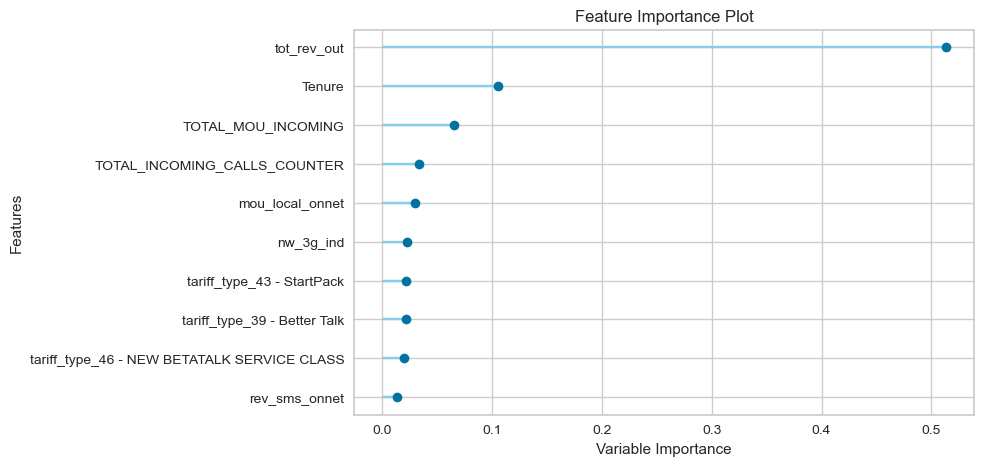

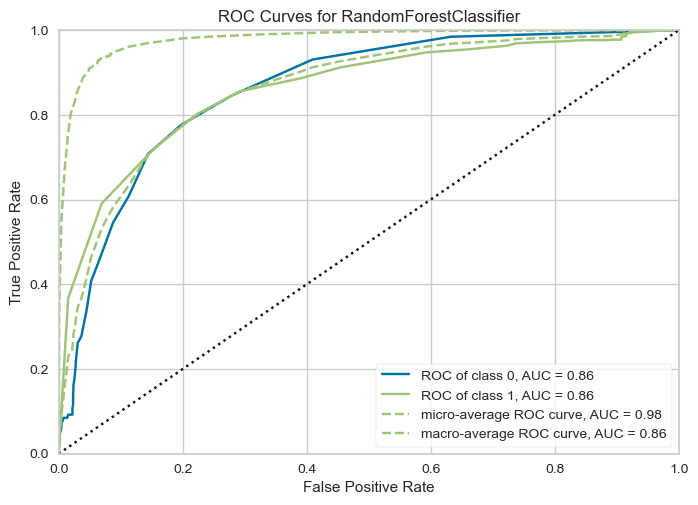

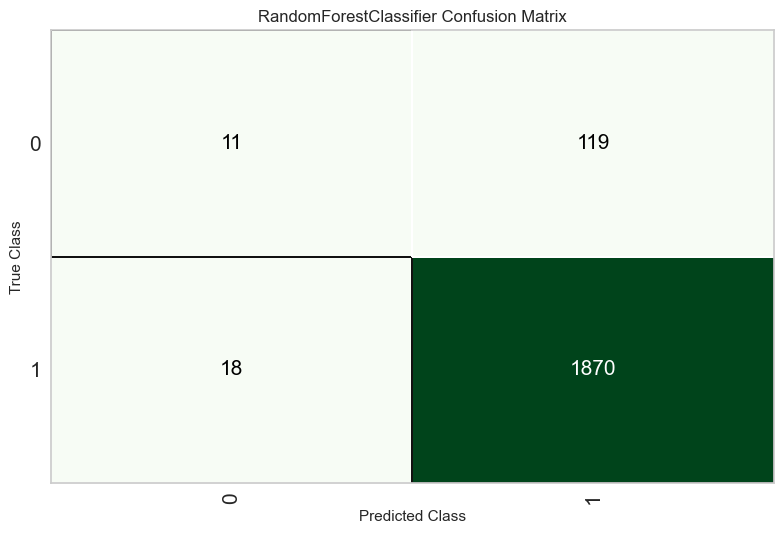

Best model for segment HIGH: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=4053, verbose=0,
                       warm_start=False)
Running model for segment: MEDIUM


,Description,Value
0,Session id,2641
1,Target,churn_flag
2,Target type,Binary
3,Original data shape,"(26892, 39)"
4,Transformed data shape,"(40096, 37)"
5,Transformed train set shape,"(32028, 37)"
6,Transformed test set shape,"(8068, 37)"
7,Ignore features,1
8,Numeric features,34
9,Categorical features,3


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6616,0.7718,0.6424,0.9410,0.7635,0.2368,0.2984,0.6790
et,Extra Trees Classifier,0.8277,0.7213,0.9294,0.8757,0.9017,0.2074,0.2139,0.3660
knn,K Neighbors Classifier,0.6937,0.7132,0.7071,0.9132,0.7971,0.2119,0.2437,0.2400
ridge,Ridge Classifier,0.7699,0.7089,0.8491,0.8765,0.8626,0.1559,0.1567,0.1090
lda,Linear Discriminant Analysis,0.7698,0.7086,0.8493,0.8763,0.8626,0.1551,0.1559,0.1130
nb,Naive Bayes,0.3768,0.7028,0.2879,0.9335,0.4399,0.0651,0.1384,0.0960
lightgbm,Light Gradient Boosting Machine,0.8166,0.6969,0.9071,0.8810,0.8938,0.2232,0.2251,0.3360
rf,Random Forest Classifier,0.8160,0.6957,0.9067,0.8806,0.8934,0.2212,0.2231,0.7260
xgboost,Extreme Gradient Boosting,0.8114,0.6949,0.8993,0.8814,0.8902,0.2195,0.2203,0.2140
gbc,Gradient Boosting Classifier,0.7953,0.6834,0.8677,0.8891,0.8782,0.2370,0.2381,1.6770


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6750,0.7851,0.6579,0.9428,0.7750,0.2515,0.3121
1,0.6628,0.7682,0.6436,0.9416,0.7646,0.2384,0.3003
2,0.6479,0.7552,0.6298,0.9351,0.7527,0.2154,0.2743
3,0.6575,0.7770,0.6367,0.9418,0.7598,0.2342,0.2973
4,0.6732,0.7685,0.6571,0.9410,0.7738,0.2471,0.3064
5,0.6541,0.7789,0.6284,0.9473,0.7555,0.2396,0.3084
6,0.6886,0.7860,0.6746,0.9432,0.7866,0.2656,0.3236
7,0.6684,0.7706,0.6465,0.9469,0.7684,0.2521,0.3178
8,0.6530,0.7675,0.6315,0.9413,0.7559,0.2297,0.2932


Fitting 10 folds for each of 10 candidates, totalling 100 fits


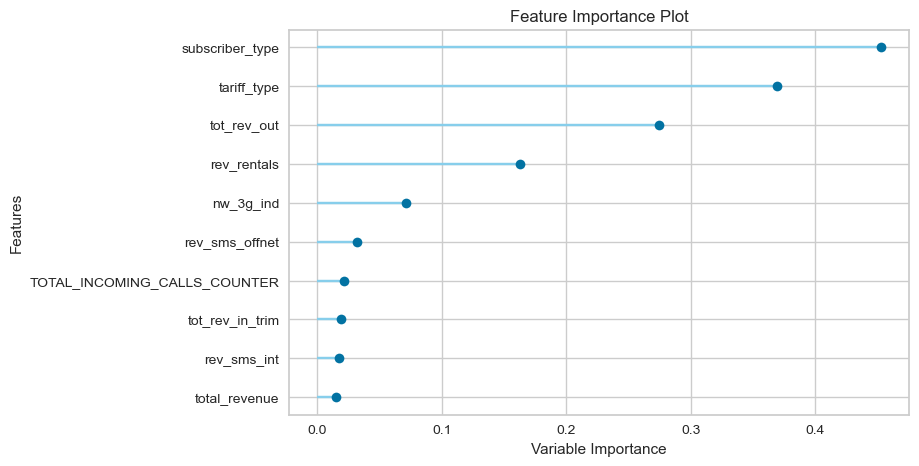

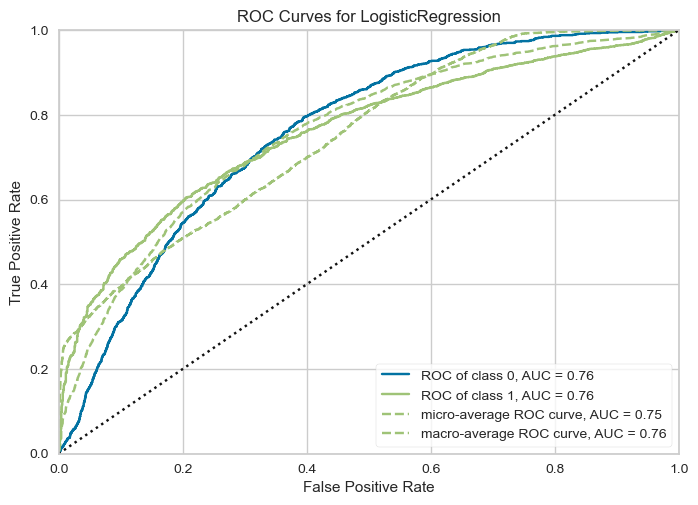

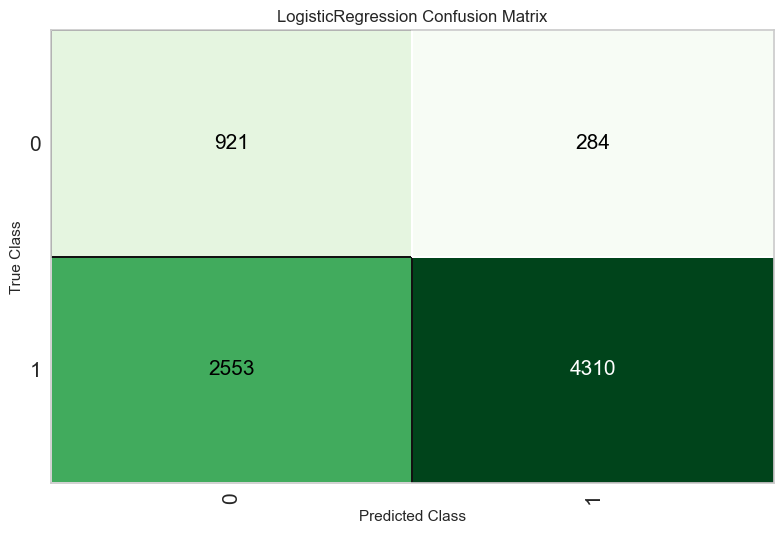

Best model for segment MEDIUM: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2641, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Running model for segment: LOW


,Description,Value
0,Session id,7682
1,Target,churn_flag
2,Target type,Binary
3,Original data shape,"(33622, 39)"
4,Transformed data shape,"(47217, 37)"
5,Transformed train set shape,"(37130, 37)"
6,Transformed test set shape,"(10087, 37)"
7,Ignore features,1
8,Numeric features,34
9,Categorical features,3


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8979,0.9220,0.8034,0.7372,0.7687,0.7033,0.7046,0.5820
rf,Random Forest Classifier,0.8972,0.9210,0.8107,0.7319,0.7691,0.7033,0.7049,0.6730
xgboost,Extreme Gradient Boosting,0.8950,0.9183,0.7402,0.7573,0.7485,0.6822,0.6824,0.3500
lightgbm,Light Gradient Boosting Machine,0.8965,0.9175,0.7521,0.7565,0.7542,0.6886,0.6887,0.4000
gbc,Gradient Boosting Classifier,0.8929,0.9085,0.7628,0.7388,0.7506,0.6824,0.6826,1.0970
ada,Ada Boost Classifier,0.8841,0.8989,0.7419,0.7190,0.7301,0.6563,0.6566,0.4370
knn,K Neighbors Classifier,0.8787,0.8945,0.7829,0.6867,0.7316,0.6537,0.6561,0.9480
lr,Logistic Regression,0.8735,0.8689,0.6503,0.7247,0.6846,0.6058,0.6078,122.7230
nb,Naive Bayes,0.8497,0.8577,0.3384,0.8705,0.4870,0.4184,0.4829,0.8960
dt,Decision Tree Classifier,0.8902,0.8367,0.7225,0.7492,0.7354,0.6662,0.6665,0.1900


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9040,0.9079,0.7586,0.7805,0.7694,0.7088,0.7089
1,0.8993,0.8964,0.7324,0.7778,0.7544,0.6912,0.6917
2,0.8946,0.9021,0.7143,0.7701,0.7411,0.6751,0.6759
3,0.8968,0.9034,0.7022,0.7860,0.7418,0.6775,0.6792
4,0.8934,0.8975,0.7223,0.7606,0.7410,0.6739,0.6743
5,0.8959,0.8995,0.7103,0.7775,0.7424,0.6773,0.6784
6,0.8993,0.9069,0.7304,0.7790,0.7539,0.6907,0.6912
7,0.9010,0.9018,0.7344,0.7833,0.7580,0.6959,0.6964
8,0.8980,0.9051,0.7163,0.7824,0.7479,0.6841,0.6852


Fitting 10 folds for each of 10 candidates, totalling 100 fits


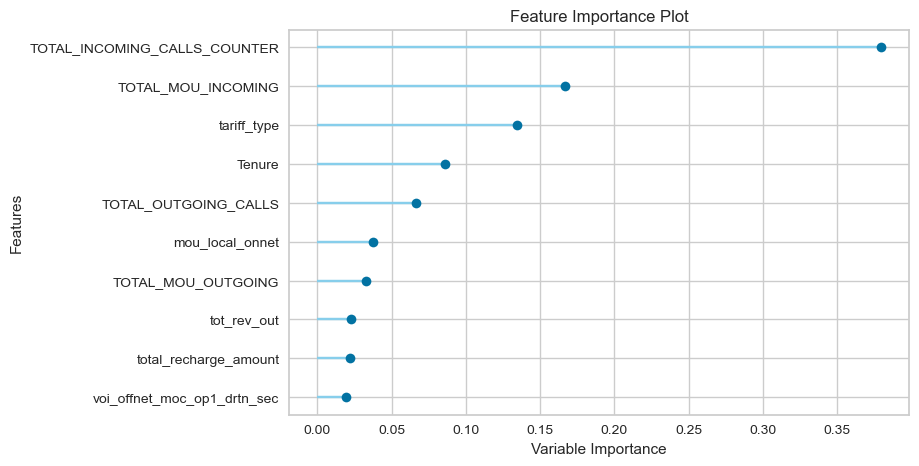

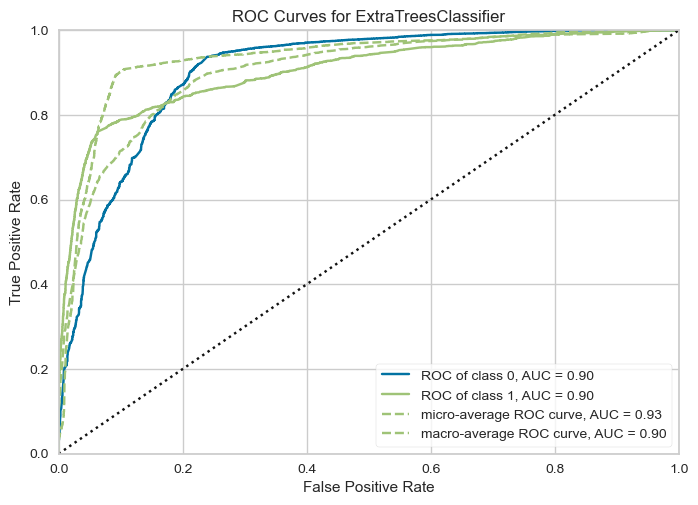

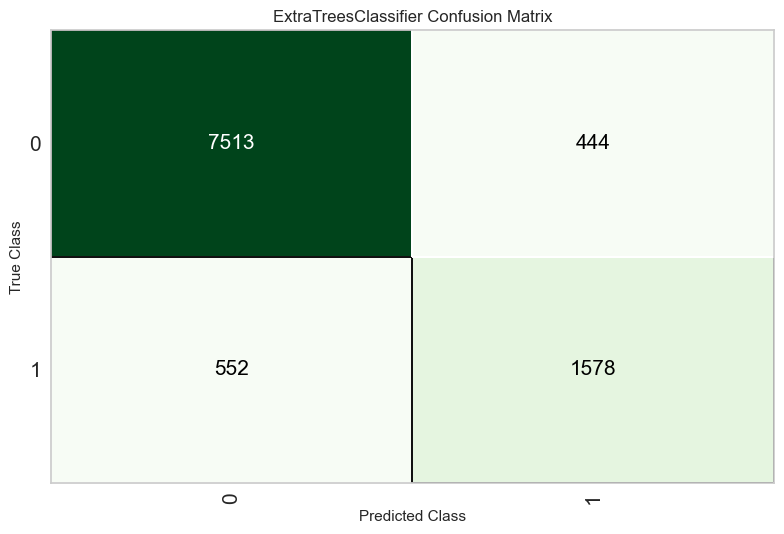

Best model for segment LOW: ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=7682, verbose=0,
                     warm_start=False)


In [681]:
# Iterate over each segment and run PyCaret
for segment in segments:
    print(f'Running model for segment: {segment}')
    segment_df = df[df['segment'] == segment]  # Filter for the current segment
    segment_df_copy = segment_df.drop(['segment'], axis=1)

    # numeric_columns = segment_df.select_dtypes(include=['number']).columns  # Select numeric columns
    # segment_df = segment_df.loc[:, segment_df[numeric_columns].std() != 0] 

    # Set up PyCaret for this segment
    s = setup(segment_df_copy, 
              target='churn_flag', 
              ignore_features=['Customer ID'], 
              remove_multicollinearity=True,
              imputation_type="simple",
              fix_imbalance=True,  # Enable this to automatically fix the imbalance
              # Choose method
              fix_imbalance_method='smote'
              )
    
    # Compare models for the current segment
    best_model = compare_models(sort='AUC')
    # tune best model
    tuned_best_model = tune_model(best_model)
    # Feature Importance Plot
    plot_model(tuned_best_model, plot = 'feature')
    # AUC Plot
    plot_model(tuned_best_model, plot = 'auc')
    # Confusion Matrix
    plot_model(tuned_best_model, plot = 'confusion_matrix')

    # Display the best model for the current segment
    print(f'Best model for segment {segment}: {best_model}')

In [619]:
# Drop the 'segment' column
df_copy = df.drop(columns=['segment'], errors='ignore')

In [620]:
#init setup
from pycaret.classification import *
s = setup(df_copy, target='churn_flag', ignore_features = ['Customer ID',''], remove_multicollinearity=True,imputation_type="simple")

,Description,Value
0,Session id,7646
1,Target,churn_flag
2,Target type,Binary
3,Original data shape,"(67238, 39)"
4,Transformed data shape,"(67238, 37)"
5,Transformed train set shape,"(47066, 37)"
6,Transformed test set shape,"(20172, 37)"
7,Ignore features,2
8,Numeric features,34
9,Categorical features,3


In [621]:
# compare all models
best_model = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8798,0.9282,0.9197,0.8658,0.8919,0.7567,0.7585,0.5530
knn,K Neighbors Classifier,0.8749,0.9241,0.9003,0.8719,0.8859,0.7475,0.7480,0.4950
lightgbm,Light Gradient Boosting Machine,0.8419,0.9177,0.8142,0.8836,0.8474,0.6840,0.6865,0.3320
gbc,Gradient Boosting Classifier,0.8437,0.9171,0.8149,0.8862,0.8490,0.6876,0.6903,1.1710
ada,Ada Boost Classifier,0.8651,0.9166,0.8669,0.8812,0.8739,0.7289,0.7292,0.4280
xgboost,Extreme Gradient Boosting,0.8393,0.9145,0.8077,0.8844,0.8442,0.6789,0.6820,0.2210
rf,Random Forest Classifier,0.8309,0.9144,0.8061,0.8708,0.8372,0.6618,0.6641,0.6920
nb,Naive Bayes,0.6546,0.8956,0.3891,0.9296,0.5485,0.3378,0.4227,0.1250
lr,Logistic Regression,0.8276,0.8918,0.7540,0.9112,0.8252,0.6582,0.6697,1.4430
ridge,Ridge Classifier,0.8240,0.8902,0.7909,0.8710,0.8290,0.6485,0.6518,0.1150


In [622]:
# tune best model
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8638,0.9202,0.8799,0.8693,0.8745,0.7257,0.7257
1,0.8717,0.9248,0.8822,0.8802,0.8812,0.7417,0.7417
2,0.8594,0.9201,0.8637,0.8741,0.8689,0.7172,0.7173
3,0.8534,0.9130,0.8641,0.8641,0.8641,0.7050,0.7050
4,0.8655,0.9209,0.8716,0.8782,0.8749,0.7295,0.7296
5,0.8625,0.9239,0.8712,0.8736,0.8724,0.7234,0.7234
6,0.8559,0.9135,0.8665,0.8665,0.8665,0.7100,0.7100
7,0.8714,0.9273,0.8790,0.8822,0.8806,0.7414,0.7414
8,0.8559,0.9166,0.8727,0.8619,0.8673,0.7098,0.7098


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


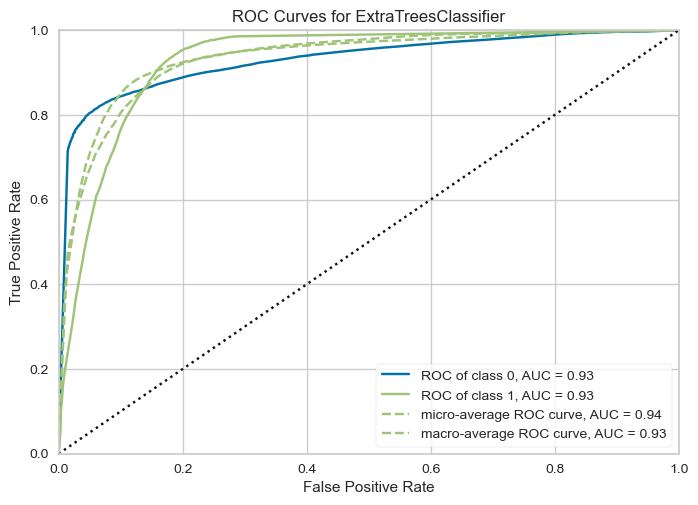

In [623]:
# AUC Plot
plot_model(tuned_best_model, plot = 'auc')

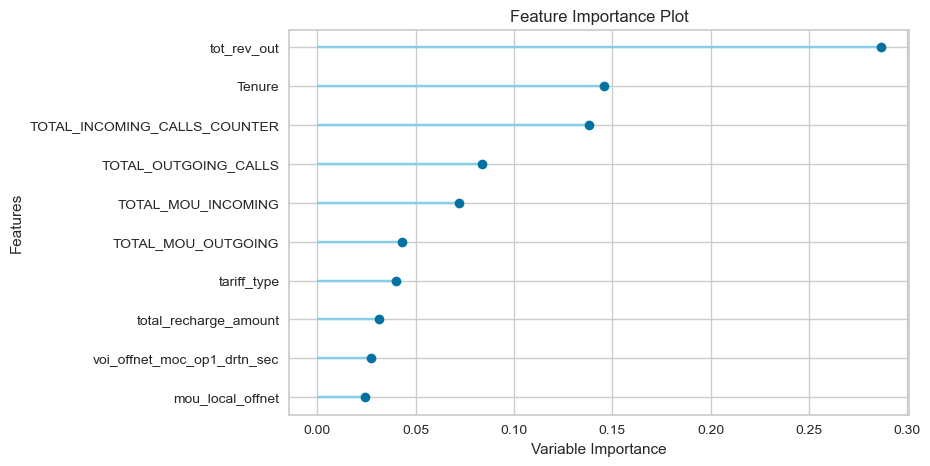

In [624]:
# Feature Importance Plot
plot_model(tuned_best_model, plot = 'feature')

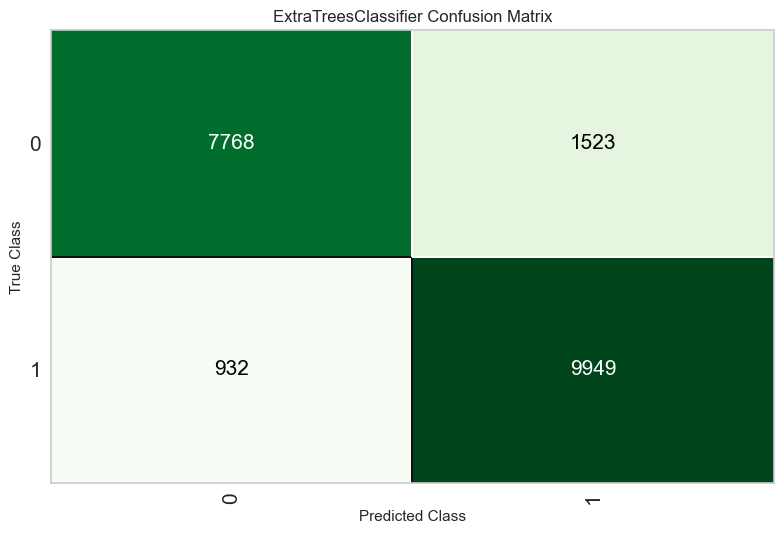

In [625]:
# Confusion Matrix
plot_model(tuned_best_model, plot = 'confusion_matrix')

- True Positives = 307
- True Negatives = 1397
- False Positive = 140
- False Negative = 269

In a churn model, often the reward of true positives is way different than the cost of false positives. 
Let’s use the following assumptions:

- USD 1,000 voucher will be offered to all the customers identified as churn (True Positive + False Positive)
- If we are able to stop the churn, we will gain USD 5,000 in customer lifetime value. 

<b> Total Impact = USD 1,088,000 </b>

Let's create an additional metric that accounts for "profitability"

In [626]:
def calculate_profit(y, y_pred):
    tp = np.where((y_pred==1) & (y==1), (5000-1000), 0)
    fp = np.where((y_pred==1) & (y==0), -1000, 0)
    return np.sum([tp,fp])# add metric to PyCaret
add_metric('profit', 'Profit', calculate_profit)

Name                                                            Profit
Display Name                                                    Profit
Score Function       <pycaret.internal.metrics.EncodedDecodedLabels...
Scorer               make_scorer(calculate_profit, response_method=...
Target                                                            pred
Args                                                                {}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: profit, dtype: object

In [627]:
best_model = compare_models(sort='Profit')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Profit,TT (Sec)
lr,Logistic Regression,0.8276,0.8918,0.7540,0.9112,0.8252,0.6582,0.6697,0.0000,1.2560
knn,K Neighbors Classifier,0.8749,0.9241,0.9003,0.8719,0.8859,0.7475,0.7480,0.0000,0.5030
nb,Naive Bayes,0.6546,0.8956,0.3891,0.9296,0.5485,0.3378,0.4227,0.0000,0.1250
dt,Decision Tree Classifier,0.7990,0.8027,0.7438,0.8647,0.7996,0.6003,0.6073,0.0000,0.1420
svm,SVM - Linear Kernel,0.8653,0.8774,0.8652,0.8827,0.8738,0.7293,0.7297,0.0000,0.1610
ridge,Ridge Classifier,0.8240,0.8902,0.7909,0.8710,0.8290,0.6485,0.6518,0.0000,0.1240
rf,Random Forest Classifier,0.8309,0.9144,0.8061,0.8708,0.8372,0.6618,0.6641,0.0000,0.6860
qda,Quadratic Discriminant Analysis,0.6217,0.8901,0.3251,0.9254,0.4784,0.2790,0.3738,0.0000,0.1260
ada,Ada Boost Classifier,0.8651,0.9166,0.8669,0.8812,0.8739,0.7289,0.7292,0.0000,0.4230
gbc,Gradient Boosting Classifier,0.8437,0.9171,0.8149,0.8862,0.8490,0.6876,0.6903,0.0000,1.1260


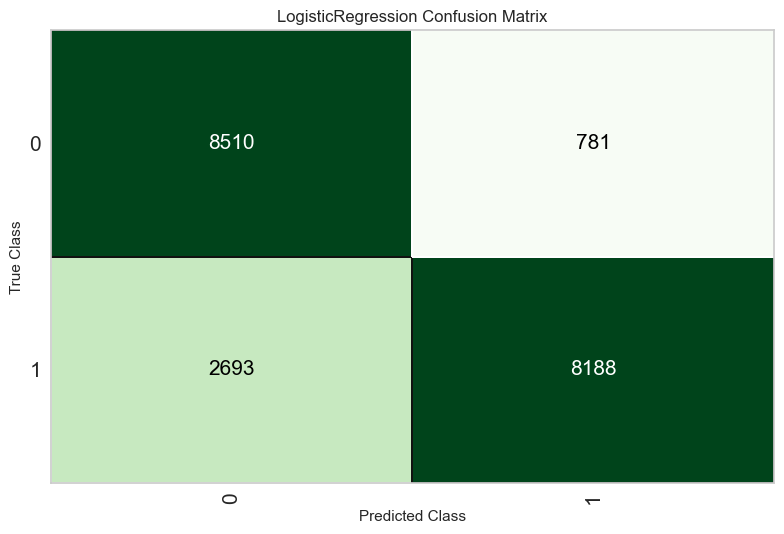

In [628]:
plot_model(best_model, plot = 'confusion_matrix')

### ----------------------------END OF MTN CHURNT DATA-------------------

#### Observation:
    
The count plots indicate that there are more customers from France than Spain or Germany, the gender distribution is nearly balanced, most customers have a credit card, and there is a higher proportion of active members

Customer ID                       int64
tariff_type                      object
subscriber_type                  object
rev_voice_roam_outgoing           int64
rev_voice_roam_incoming           int64
rev_sms_onnet                   float64
rev_sms_offnet                  float64
rev_sms_int                     float64
rev_data_rental                 float64
rev_data_payg                   float64
rev_data_total                  float64
rev_rentals                     float64
rev_other                         int64
tot_rev_out                      object
voi_onnet_out_secs_free           int64
voi_onnet_out_counter_free        int64
voi_offnet_out_secs_free          int64
voi_offnet_out_counter_free       int64
int_moc_countries                 int64
int_mtc_countries                 int64
voi_offnet_moc_op1_drtn_sec     float64
mou_local_onnet                 float64
mou_local_offnet                float64
mou_intl                        float64
total_recharge_amount           float64
nw_3g_ind                       float64
lte_4g_ind                      float64
postpaid_subscriptions            int64
reversed_bill_rev                 int64
churn_flag                        int64
tot_rev_in_trim                 float64
total_revenue                   float64
TOTAL_INCOMING_CALLS_COUNTER    float64
TOTAL_OUTGOING_CALLS            float64
TOTAL_MOU_INCOMING              float64
TOTAL_MOU_OUTGOING              float64
TOTAL_VOICE_REVENUE             float64
Tenure                          float64
TOTAL_REV_VAS                   float64
segment                          object

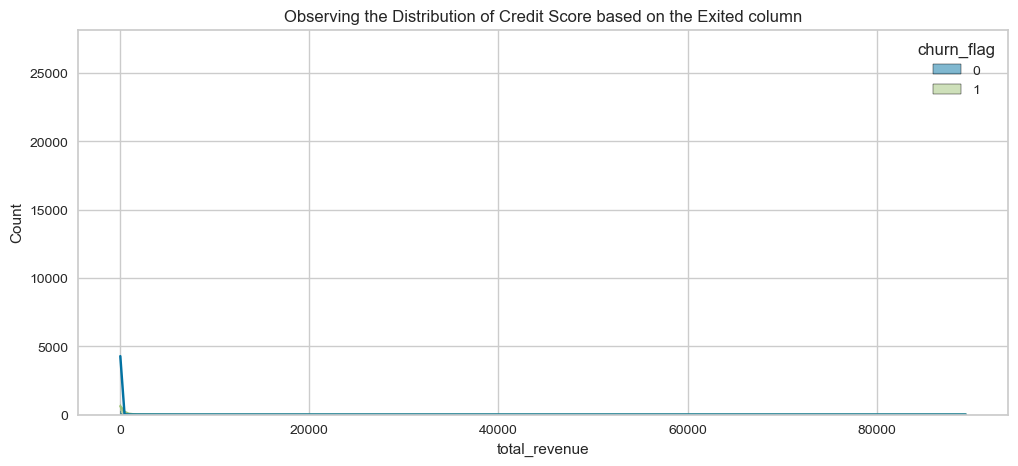

In [629]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x='total_revenue', hue='churn_flag', kde=True)
plt.title('Observing the Distribution of Credit Score based on the Exited column')
plt.show()

#### Observation:

By observing the distribution of credit scores among customers who have churned versus those who haven't, we can see that there is no stark contrast between the two groups, implying that credit score alone may not be a strong predictor of churn within this dataset.

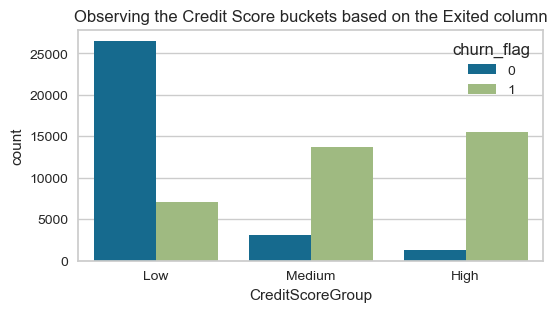

In [630]:
bins = [0,669,739,850]
labels = ['Low','Medium','High']

# Calculate percentiles for bins (e.g., 0%, 50%, and 75%)
percentiles = df['total_revenue'].quantile([0, 0.5, 0.75, 1]).tolist()

df['CreditScoreGroup'] = pd.cut(df['total_revenue'], bins=percentiles, labels=labels, include_lowest=True)

plt.figure(figsize=(6,3))
sns.countplot(x = 'CreditScoreGroup', hue = 'churn_flag', data = df)
plt.title('Observing the Credit Score buckets based on the Exited column')
plt.show()

#### Observation:

Majority of customers who churned are in the 'High' credit score group, suggesting that credit score might have some influence on churn, albeit not a straightforward one

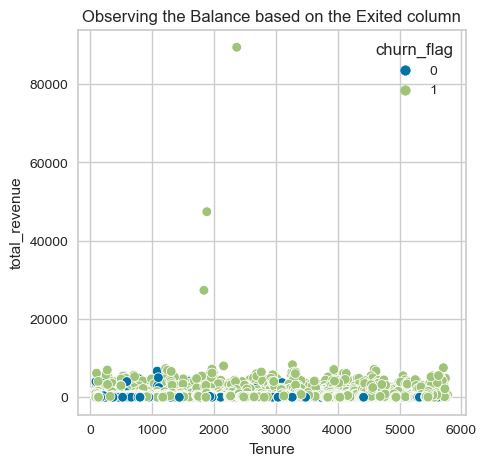

In [631]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='Tenure', y='total_revenue', hue='churn_flag', data=df)
plt.title('Observing the Balance based on the Exited column')
plt.show()

#### Observation:

The scatter plot indicates that there is no clear pattern or correlation between tenure and balance for both churned and retained customers, implying these factors independently do not strongly predict customer churn

## Feature Engineering

### *Exploring the relationship between features*

a. **Credit Utilization**: Ratio of balance to credit score. It can give an insight into how much of the available credit the customer is using

b. **Interaction Score**: A composite score based on the number of products, active membership, and credit card possession which can give a holistic view of a customer's engagement with the bank. Higher engagement levels might be associated with lower churn rates

c. **Balance To Salary Ratio**: Ratio of the customer's balance to their estimated salary. This feature can indicate how significant the customer's balance is in relation to their income

d. **Credit Score Age Interaction**: An interaction term between credit score and age to explore if the impact of credit score on churn varies across different age groups

In [632]:
df['CreditUtilization']=df['Balance']/df['CreditScore']

df['InteractionScore']=df['NumOfProducts']+df['HasCrCard']+df['IsActiveMember']

df['BalanceToSalaryRatio']=df['Balance']/df['EstimatedSalary']

df['CreditScoreAgeInteraction']=df['CreditScore']*df['Age']

KeyError: 'Balance'

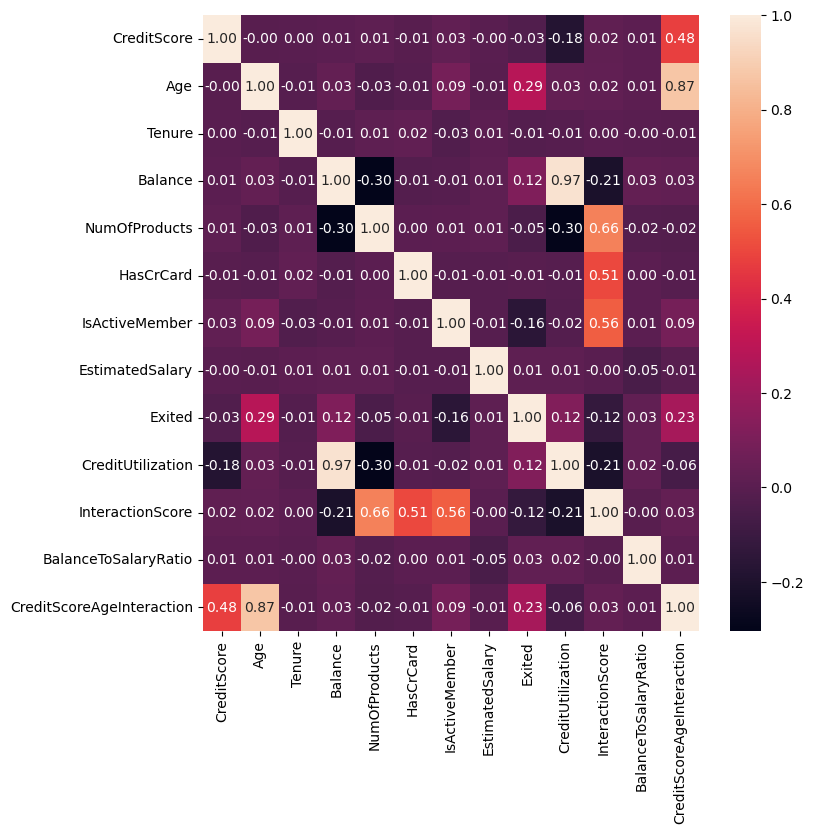

In [14]:
plt.figure(figsize = (8,8))
sns.heatmap(df.drop(['RowNumber','CustomerId'],axis=1).corr(), annot=True, fmt='.2f')
plt.show()

#### Observations:

Notable correlations include a moderate positive relationship between Age and Exited, suggesting older customers are more likely to churn, and a strong positive relationship between Balance and CreditUtilization, which is intuitive as higher balances would likely increase credit utilization rates

In [15]:
correlation_matrix = df.drop(['RowNumber','CustomerId'],axis=1).corr()
target_correlations = correlation_matrix['Exited']
print(target_correlations)

CreditScore                 -0.027094
Age                          0.285323
Tenure                      -0.014001
Balance                      0.118533
NumOfProducts               -0.047820
HasCrCard                   -0.007138
IsActiveMember              -0.156128
EstimatedSalary              0.012097
Exited                       1.000000
CreditUtilization            0.121692
InteractionScore            -0.122148
BalanceToSalaryRatio         0.025558
CreditScoreAgeInteraction    0.232030
Name: Exited, dtype: float64


#### Observation:

1. Age shows a moderately positive correlation, suggesting older customers are more likely to churn 
2. IsActiveMember has a negative correlation, indicating that active members are less likely to churn
3. High CreditUtilization and NumOfProducts also appear to be associated with a higher likelihood of churning

## Modeling

In [16]:
cat_col = ['Geography','Gender','CreditScoreGroup']

print("Observing the categorical column disribution before encoding: \n")
for columns in cat_col:
    print(columns, '\n')
    print(df[columns].value_counts(),'\n')

Observing the categorical column disribution before encoding: 

Geography 

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64 

Gender 

Male      5457
Female    4543
Name: Gender, dtype: int64 

CreditScoreGroup 

Low       5693
Medium    2428
High      1879
Name: CreditScoreGroup, dtype: int64 



In [25]:
encoder = LabelEncoder()

for columns in cat_col:
    df[columns] = encoder.fit_transform(df[columns])

print("Observing the categorical column disribution after encoding: \n")    
for columns in cat_col:
    print(columns, '\n')
    print(df[columns].value_counts(),'\n')

Observing the categorical column disribution after encoding: 

Geography 

0    5014
1    2509
2    2477
Name: Geography, dtype: int64 

Gender 

1    5457
0    4543
Name: Gender, dtype: int64 

CreditScoreGroup 

1    5693
2    2428
0    1879
Name: CreditScoreGroup, dtype: int64 



In [18]:
col_drop = ['Exited','RowNumber','CustomerId','Surname']
X = df.drop(col_drop, axis=1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaling_columns = ['Age','CreditScore','Balance','EstimatedSalary','CreditUtilization','BalanceToSalaryRatio','CreditScoreAgeInteraction']

scaler = StandardScaler()
scaler.fit(X_train[scaling_columns])

X_train[scaling_columns] = scaler.transform(X_train[scaling_columns])
X_test[scaling_columns] = scaler.transform(X_test[scaling_columns])

In [24]:
print("Training dataset shape:", X_train.shape, y_train.shape)
print("Test dataset shape:",X_test.shape, y_test.shape)

Training dataset shape: (7000, 15) (7000,)
Test dataset shape: (3000, 15) (3000,)


In [22]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'K-Nearest Neighbors': make_pipeline_imb(SMOTE(random_state=42), KNeighborsClassifier()),
    'Support Vector Machine': make_pipeline_imb(SMOTE(random_state=42), SVC(probability=True, random_state=42)),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train), random_state=42),
    'Gradient Boosting': make_pipeline_imb(SMOTE(random_state=42), GradientBoostingClassifier(random_state=42))
}

results_df = pd.DataFrame(columns=['Model','Accuracy','Recall Score','F1 Score','ROC AUC Score'])

lb = LabelBinarizer()
lb.fit(y_train)

for name, model in models.items():
    print(f"Model: {name}")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred),'\n')
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred),'\n')
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy Score: {accuracy} \n")
    
    recall = recall_score(y_test, y_pred, pos_label=1)
    print(f"Recall Score: {recall}")

    f1 = f1_score(lb.transform(y_test), lb.transform(y_pred), pos_label=1)
    print(f"F1 Score: {f1}")
    
    if hasattr(model, "predict_proba"):
        roc_auc = roc_auc_score(lb.transform(y_test), model.predict_proba(X_test)[:, 1])
        print(f"ROC AUC Score: {roc_auc}")
    else:
        roc_auc = None
    
    results_df = results_df.append({'Model': name, 'Accuracy': accuracy, 'Recall Score': recall, 'F1 Score': f1, 'ROC AUC Score': roc_auc}, ignore_index=True)
    
    print("-" * 50,'\n')

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      2416
           1       0.36      0.68      0.47       584

    accuracy                           0.70      3000
   macro avg       0.63      0.70      0.63      3000
weighted avg       0.80      0.70      0.73      3000
 

Confusion Matrix:
[[1712  704]
 [ 185  399]] 

Accuracy Score: 0.7036666666666667 

Recall Score: 0.6832191780821918
F1 Score: 0.47302904564315357
ROC AUC Score: 0.7640763914088724
-------------------------------------------------- 

Model: Random Forest
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2416
           1       0.77      0.41      0.54       584

    accuracy                           0.86      3000
   macro avg       0.82      0.69      0.73      3000
weighted avg       0.85      0.86      0.84      3000
 

Confusion Matrix:
[[2344   72]
 [ 342  242]] 

Accuracy Scor

In [23]:
results_df

,Model,Accuracy,Recall Score,F1 Score,ROC AUC Score
0,Logistic Regression,0.703667,0.683219,0.473029,0.764076
1,Random Forest,0.862000,0.414384,0.538976,0.852447
2,K-Nearest Neighbors,0.752333,0.667808,0.512147,0.776639
3,Support Vector Machine,0.785667,0.662671,0.546224,0.822503
4,XGBoost,0.833000,0.609589,0.586974,0.841784
5,Gradient Boosting,0.817000,0.700342,0.598391,0.859767


From the results of the classification models on the churn prediction dataset, we can infer the following:

1. **Gradient Boosting** has the highest F1 score (0.598391) and the highest ROC AUC score (0.859767) among all the models. This suggests that Gradient Boosting is the most effective model in balancing precision and recall and has the best ability to distinguish between the churned and non-churned customers.

2. **XGBoost** also performs well, with a relatively high F1 score (0.586974) and a good ROC AUC score (0.841784). This indicates that XGBoost is another strong model for this task.

3. **Random Forest** has a high accuracy (0.862000) but a lower F1 score (0.538976) compared to Gradient Boosting and XGBoost. This suggests that while Random Forest is good at predicting the majority class (non-churned customers), it might not be as effective at identifying the minority class (churned customers).

4. **Support Vector Machine** and **K-Nearest Neighbors** have moderate F1 scores and ROC AUC scores. They perform better than Logistic Regression but are not as effective as Gradient Boosting or XGBoost for this dataset.

5. **Logistic Regression** has the lowest accuracy (0.703667), F1 score (0.473029), and ROC AUC score (0.764076) among all the models. This indicates that Logistic Regression is the least effective model for predicting customer churn in this dataset.

#### Overall:

Gradient Boosting appears to be the best model for this churn prediction task, followed closely by XGBoost. These models are able to better handle the class imbalance and provide a good balance between precision and recall. 